####  *In this jupyter notebook we have performed tha EDA( Exploratory Data Analysis) and using the Machine Learning algorithms we have predicted the Average ratings of the book. We have used the goodreadsbooks datasets.*

#### *Tools and technologies we have used.*
##### 1. Python : general-purpose programming language.  <br><br>2. Pandas : pandas is a software library written for the Python programming language for data manipulation and analysis. <br><br> 3. Numpy : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. <br><br> 4. Matplotlib : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose. <br><br> 5. Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br> 6. scikit learn : scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. 

In [148]:
#Import all packages that will be used during this project.

import pandas as pd                                                    
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle
from sklearn import metrics


*To read the csv file as pandas.DataFrame, use the pandas function <br>1.read_csv() <br>2.read_table().<br>
The difference between read_csv() and read_table() is almost nothing. In fact, the same function is called by the source:
read_csv() delimiter is a comma character
read_table() is a delimiter of tab \t.*

In [149]:
file = "D:/Users/mayan/Downloads/books.csv"
df = pd.read_csv(file,sep=',',error_bad_lines=False)
df.shape

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


(11123, 12)

#### *The describe() method returns description of the data in the DataFrame.*

*If the DataFrame contains numerical data, the description contains these information for each column:*
 - count - The number of not-empty values.<br>
 - mean - The average (mean) value.<br>
 - std - The standard deviation.<br>
 - min - the minimum value.<br>
 - 25% - The 25% percentile*.<br>
 - 50% - The 50% percentile*.<br>
 - 75% - The 75% percentile*.<br>
 - max - the maximum value.<br>

###### *Pandas profiling*
*It is a Python library that provides an automatic exploratory data analysis (EDA) report for a pandas DataFrame. It generates a detailed report containing information on the data type, missing values, distribution, correlation, and statistics of the variables in the DataFrame. The report is generated in HTML format and can be easily shared or exported.*

In [133]:
from pandas_profiling import ProfileReport
#Generate a report
profile=ProfileReport(df)
profile.to_file(output_file="BooksAnalysis.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


#### Dtypes() method

*This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype.*

In [151]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

#####  *In the below code cell we are extracting the calculating the age from the publocation_date.*

In [152]:
#Add age of the book
df['publication_year']=df.apply(lambda x: x['publication_date'][-4:], axis=1)
df['publication_year'] = pd.to_numeric(df['publication_year'])
df['age']=df.publication_year.apply(lambda x: x if x < 1 else 2023-x)

In [153]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce') # Convert data type of publication_date from object into date type
df[df['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,age
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books,2000,23
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire,1982,41


In [154]:
df.loc[df.bookID == 31373, 'publication_date'] = '1999-10-01 00:00:00'
df.loc[df.bookID == 45531, 'publication_date'] = '1975-10-01 00:00:00'

In [155]:
df.index=df['bookID']
df.shape

(11123, 14)

#### *In the below cell we are calculating the distinct values present in the each columns.*

In [156]:
for features in df.columns:
    distinct_values=np.unique(df[features])
    print('{}:{} distinct values\n'.format(features,len(distinct_values)))

bookID:11123 distinct values

title:10348 distinct values

authors:6639 distinct values

average_rating:209 distinct values

isbn:11123 distinct values

isbn13:11123 distinct values

language_code:27 distinct values

  num_pages:997 distinct values

ratings_count:5294 distinct values

text_reviews_count:1822 distinct values

publication_date:3678 distinct values

publisher:2290 distinct values

publication_year:87 distinct values

age:87 distinct values



In [157]:
# We are renaming the num_pages to remove the trailing space.
df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)

In [158]:
#Check the language codes, We are checking the unique values present in the Language_code.Using Value count method()
#value_counts():Return a Series containing counts of unique values.
df['language_code']=df['language_code'].str.lower()
df.language_code.unique()
df.language_code.value_counts()

eng      8908
en-us    1408
spa       218
en-gb     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-ca       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [159]:
#Replace language codes with full names
mapping = [('fre','French'), ('spa','Spanish'), ('mul','Multiple languages'), ('grc','Ancient Greek'), ('ger','German'), 
           ('jpn','Japanese'), ('ara','Arabic'), ('nl', 'Dutch'), ('zho', 'Chinese'), ('lat', 'Latin'),
           ('por','Portuguese'), ('srp','Serbian'), ('ita', 'Italian'), ('rus', 'Russian'), ('msa', 'Malay'),
           ('glg','Galician'), ('wel','Welsh'), ('swe', 'Swedish'), ('nor', 'Norwegian'), ('tur', 'Turkish'),
           ('gla','Gaelic'), ('ale','Aleut'), ('eng', 'English'), ('en-us', 'English'), ('en-gb', 'English'),
           ('enm','English'), ('en-ca','English')]
for i,j in mapping:
    df.language_code = df.language_code.replace(i, j)
df.language_code.unique()
df.language_code.value_counts()

English               10540
Spanish                 218
French                  144
German                   99
Japanese                 46
Multiple languages       19
Chinese                  14
Ancient Greek            11
Portuguese               10
Italian                   5
Latin                     3
Russian                   2
Swedish                   2
Dutch                     1
Arabic                    1
Serbian                   1
Malay                     1
Galician                  1
Welsh                     1
Norwegian                 1
Turkish                   1
Gaelic                    1
Aleut                     1
Name: language_code, dtype: int64

In [160]:
#We are changing the name of the J.K. Rowling/Mary GrandPré to J.k Rowling becuse she is much known for this name.
df.replace(to_replace='J.K. Rowling/Mary GrandPré',value='J.K Rowling',inplace=True)


### *Exploratory data analysis*

In [161]:
"""The copy() method returns a copy of the DataFrame. By default, the copy is a "deep copy" 
meaning that any changes made in the original DataFrame will NOT be reflected in the copy."""

books_df=df.copy()

In [162]:
books_df.sample()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,age
bookID,,,,,,,,,,,,,,
17644,17644,Moral Disorder and Other Stories,Margaret Atwood,3.63,0385503849,9780385503846,English,255,8270,755,2006-10-17,Nan A. Talese,2006,17


In [163]:
# df.drop() method: Drop specified labels from rows or columns.
#Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names.

books_df=books_df.drop(['isbn','isbn13','publication_date'],axis=1)


In [164]:
#df.sample() method:Return a random sample of items from an axis of object.

books_df.sample()


,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,age
bookID,,,,,,,,,,,
6815,6815,American Sign Language The Easy Way,David A. Stewart/Jessalyn Little/Elizabeth ...,3.75,English,480,34,6,Barrons Educational Series,2006,17


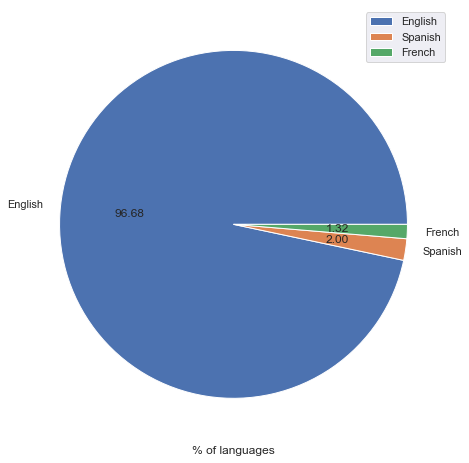

In [226]:
#Categorical columns
#Pie chart
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 8))
explode = [0, 0.1, 0, 0, 0]
books_df.language_code.value_counts().head(3).plot(kind='pie',label='',autopct='%1.2f', ax=ax1, ).legend()
ax1.set_xlabel('% of languages', size=12)
plt.show()

#data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [ ]:
#Let's Examine the top 20 books from the dataset

In [165]:
#The sort_values() method sorts the DataFrame by the specified label.
# In this cell we are sorting the dataFrame on the basis of rating count to check the books who has most number of rating counts.

top_rated_books=books_df.sort_values(by="ratings_count",ascending=False).head(10)
top_rated_titles=pd.DataFrame(top_rated_books.title).join(pd.DataFrame(top_rated_books.ratings_count))
top_rated_titles

,title,ratings_count
bookID,,
41865,Twilight (Twilight #1),4597666
5907,The Hobbit or There and Back Again,2530894
5107,The Catcher in the Rye,2457092
960,Angels & Demons (Robert Langdon #1),2418736
5,Harry Potter and the Prisoner of Azkaban (Harr...,2339585
15881,Harry Potter and the Chamber of Secrets (Harry...,2293963
2,Harry Potter and the Order of the Phoenix (Har...,2153167
34,The Fellowship of the Ring (The Lord of the Ri...,2128944
7613,Animal Farm,2111750


##### *Below graph illustrate the top 10 Books who has the maximum numbers of Ratings_count.*

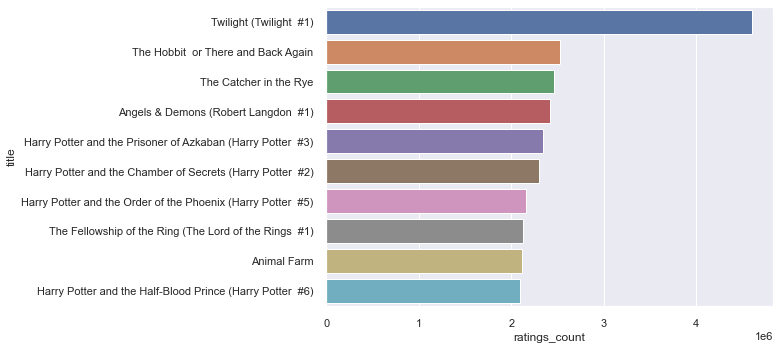

In [166]:
#we are using barplot to see the Top 10 Books with respect to the rating counts.

sns.set_style('darkgrid')
sns.barplot(x=top_rated_titles['ratings_count'],y=top_rated_titles['title'], data=top_rated_titles);

##### *Below graph illustrate the top 10 Langauges in which books has been written.*

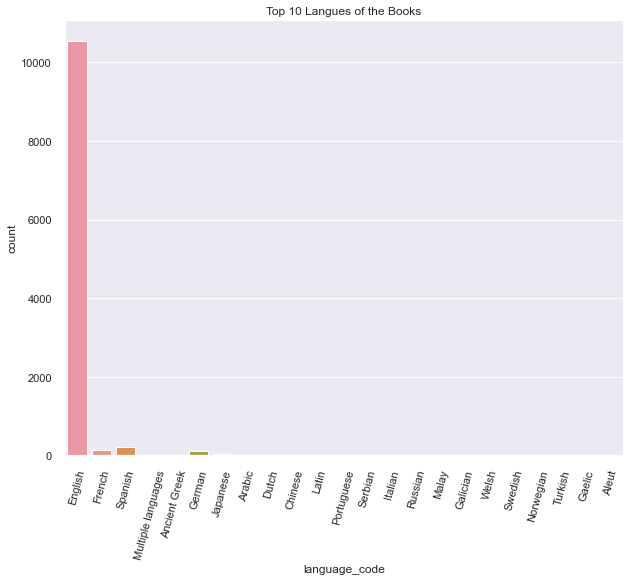

In [167]:
#We are using the countplot for representing the top 10 languages used in the Books data collection.

sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
plt.xticks(rotation=75)
sns.countplot(x=books_df.index, data=books_df['language_code'])
plt.title("Top 10 Langues of the Books")
plt.show()

##### *Below graph illustrate the number of English Books who has average_rating >=3 in every year.*

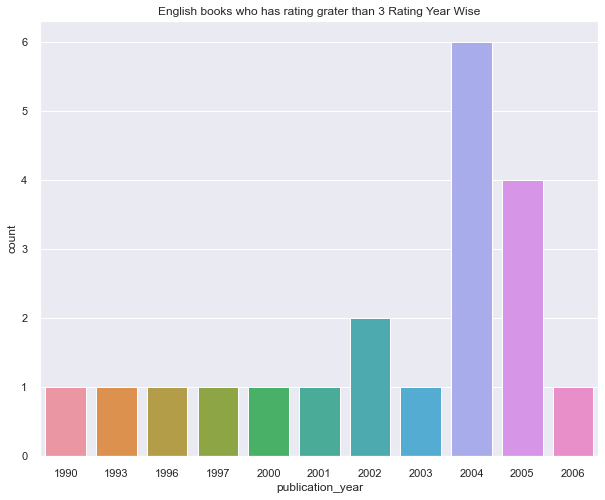

In [168]:
best_books_each_language = books_df[(books_df.language_code =='English') & (books_df.average_rating >=3)]
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x='publication_year', data=best_books_each_language.head(20))
plt.title('English books who has rating grater than 3 Rating Year Wise')
plt.show()

#### *Below graph illustrate the number of Spanish Books who has average_rating >=3 in every year.*

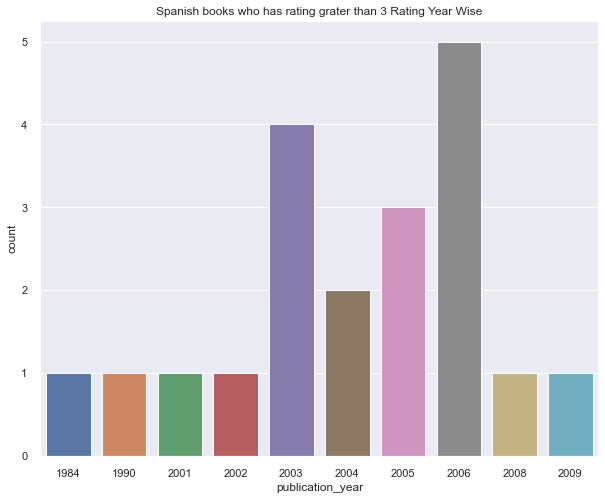

In [169]:
best_books_each_language = books_df[(books_df.language_code =='Spanish') & (books_df.average_rating >=3)]
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x='publication_year', data=best_books_each_language.head(20))
plt.title('Spanish books who has rating grater than 3 Rating Year Wise')
plt.show()

##### *Below graph illustrate the number of French Books who has average_rating >=3 in every year.*

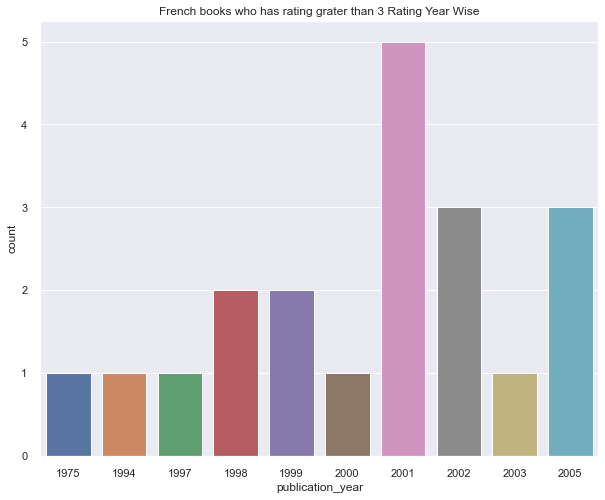

In [170]:
best_books_each_language = books_df[(books_df.language_code =='French') & (books_df.average_rating >=3)]
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x='publication_year', data=best_books_each_language.head(20))
plt.title('French books who has rating grater than 3 Rating Year Wise')
plt.show()

#### *Below graph illustrate the number of Italian Books who has average_rating >=3 in every year.*

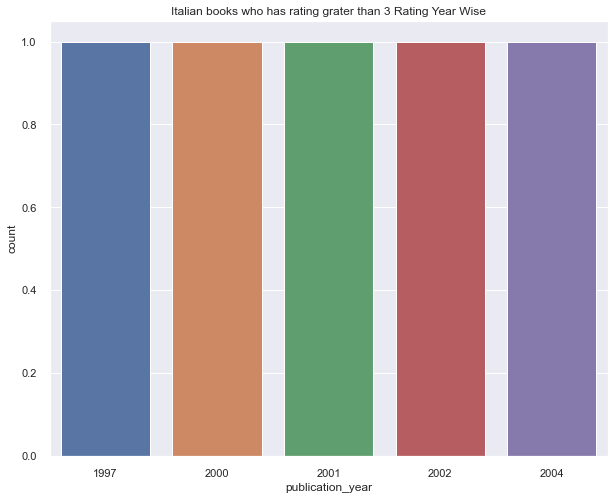

In [171]:
best_books_each_language = books_df[(books_df.language_code =='Italian') & (books_df.average_rating >=3)]
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x='publication_year', data=best_books_each_language.head(20))
plt.title('Italian books who has rating grater than 3 Rating Year Wise')
plt.show()

#### *Below graph illustrate the number of German Books who has average_rating >=3 in every year.*

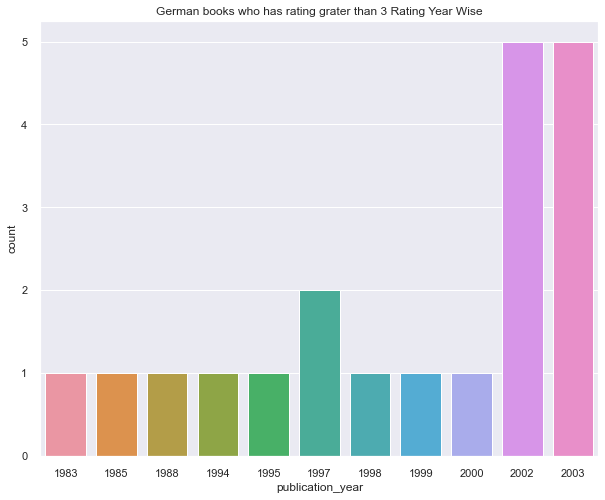

In [172]:
best_books_each_language = books_df[(books_df.language_code =='German') & (books_df.average_rating >=3)]
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.countplot(x='publication_year', data=best_books_each_language.head(20))
plt.title('German books who has rating grater than 3 Rating Year Wise')
plt.show()

In [173]:
#in this code cell we are calculating author using value_counts.
books_df['authors'].value_counts()

Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
Thich Nhat Hanh/Arnold Kotler/Dalai Lama XIV               1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: authors, Length: 6639, dtype: int64

In [25]:
#Let's Visualise the author coloumns

##### *A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.*

In [174]:
#In this code cell we are creating the new data frame called authors_data which consist author name and the rating count

authors_data=books_df.groupby('authors').sum()[['ratings_count']].sort_values('ratings_count',ascending=False).reset_index()
authors_data


,authors,ratings_count
0,J.K Rowling,8923980
1,J.R.R. Tolkien,4776638
2,Stephenie Meyer,4597666
3,Dan Brown,4135380
4,Nicholas Sparks,3048149
...,...,...
6634,Nancy White Carlstrom/Lori McElrath-Eslick,0
6635,Nayantara Sahgal,0
6636,Dobrica Erić,0
6637,Alexander Walker,0


##### *Below graph illustrate the top 10 authors who has maximum number of Rating Counts.*

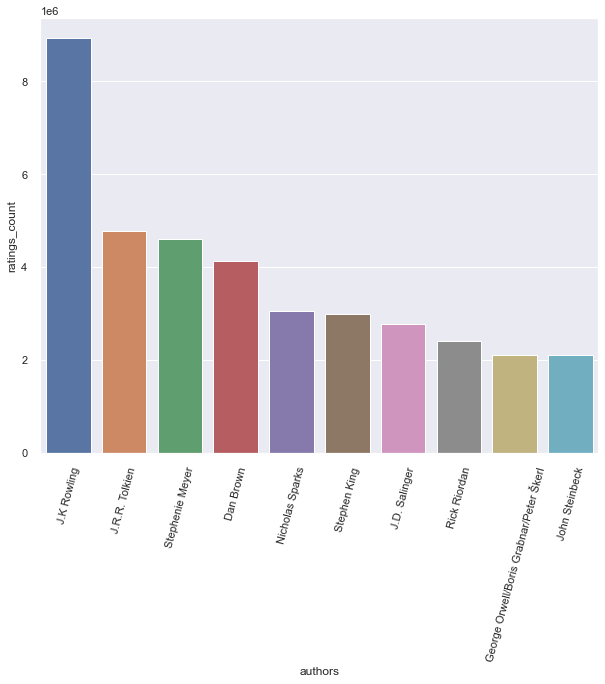

In [175]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.xticks(rotation=75)
sns.barplot(x='authors',y='ratings_count', data=authors_data.head(10));

In [176]:
authors_data_rating=books_df.groupby('authors').mean()[['average_rating']].sort_values('average_rating',ascending=False).reset_index()
#authors_data_rating[authors_data_rating['authors']=='Robert A. Caro']
authors_data_rating.head(-1)


,authors,average_rating
0,Keith Donohue,5.0
1,John Diamond,5.0
2,R. McL. Wilson,5.0
3,Nicholas Evans/Rhonda Evans,5.0
4,James E. Campbell,5.0
...,...,...
6633,Frederick P. Lenz,0.0
6634,Warren G. Bennis,0.0
6635,James Craig Holte,0.0
6636,Dan Hitt/James Beckett III,0.0


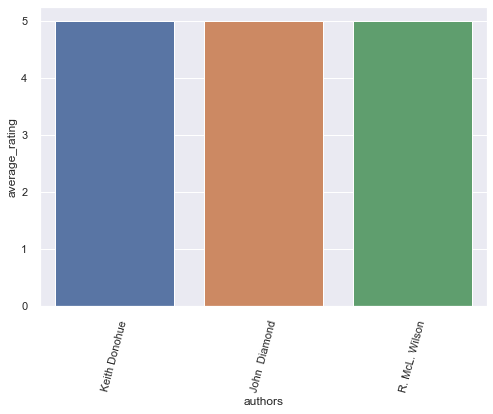

In [177]:
sns.set_style('darkgrid')
plt.xticks(rotation=75)
sns.barplot(x='authors',y='average_rating', data=authors_data_rating.head(3));

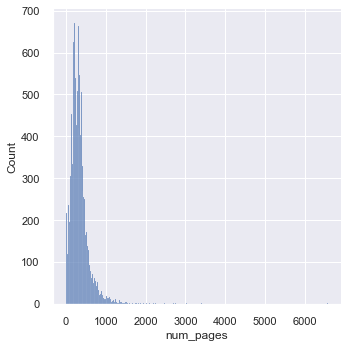

<AxesSubplot:xlabel='num_pages'>

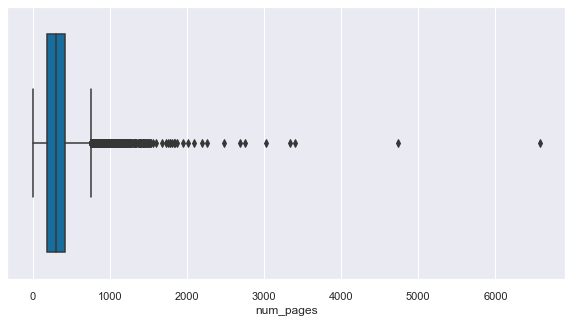

In [178]:
sns.set_style('darkgrid')
sns.displot(books_df['num_pages']);
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x=books_df['num_pages'],palette='colorblind')

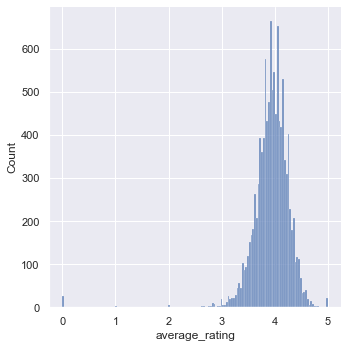

<AxesSubplot:xlabel='average_rating'>

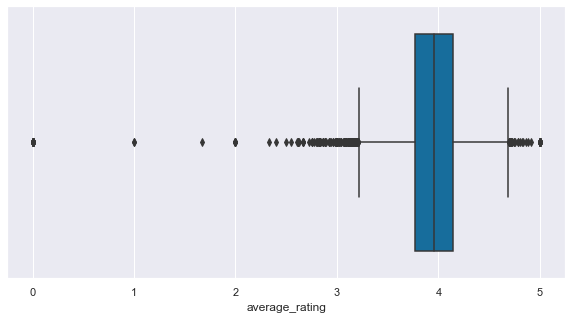

In [31]:
sns.set_style('darkgrid')
sns.displot(books_df['average_rating']);
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(x=books_df['average_rating'],palette='colorblind')

#### *relplot takes some of the same arguments as scatterplot , such as data, x, y , and hue , but adds other arguments as well.*

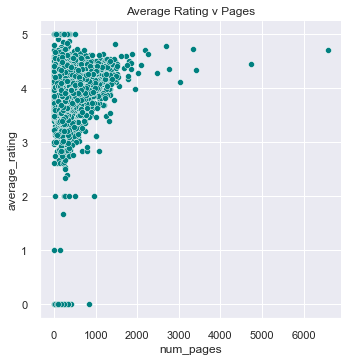

In [179]:
# In this cell we are ploting the relationship between pages and ratings. By looking at the graph we can see that in the dataset
#majority of ratings are availabe in the books who has pages <10000.

# There are few outliers in the num_pages col.

sns.relplot(x="num_pages", y="average_rating", data=books_df, color='teal').set(title='Average Rating v Pages')
plt.ticklabel_format(style='plain', axis='x')

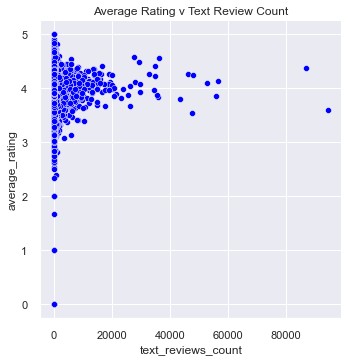

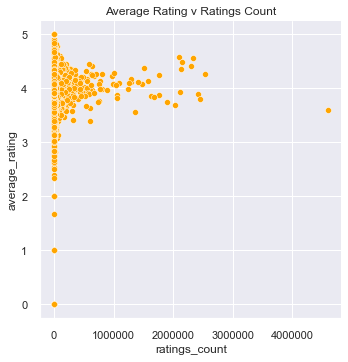

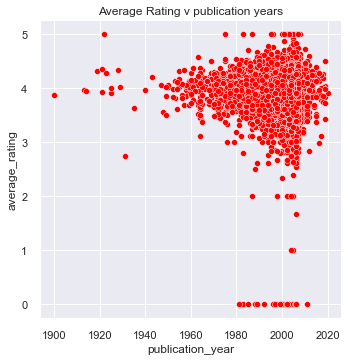

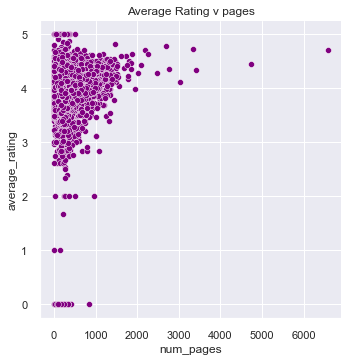

In [207]:
sns.relplot(x="text_reviews_count", y="average_rating", data=books_df, color='blue').set(title='Average Rating v Text Review Count')
plt.ticklabel_format(style='plain', axis='x')

sns.relplot(x="ratings_count", y="average_rating", data=books_df, color='orange').set(title='Average Rating v Ratings Count')
plt.ticklabel_format(style='plain', axis='x')

sns.relplot(x="publication_year", y="average_rating", data=df, color='red').set(title='Average Rating v publication years')
plt.ticklabel_format(style='plain', axis='x')

sns.relplot(x="num_pages", y="average_rating", data=df, color='purple').set(title='Average Rating v pages')
plt.ticklabel_format(style='plain', axis='x')


<AxesSubplot:xlabel='average_rating', ylabel='num_pages'>

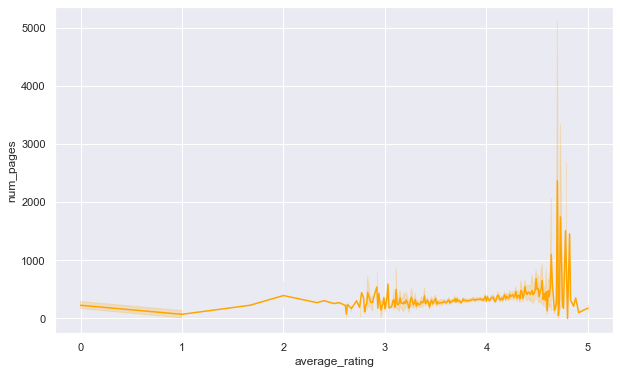

In [37]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.lineplot(x="average_rating", y="num_pages", data=books_df, color='orange')

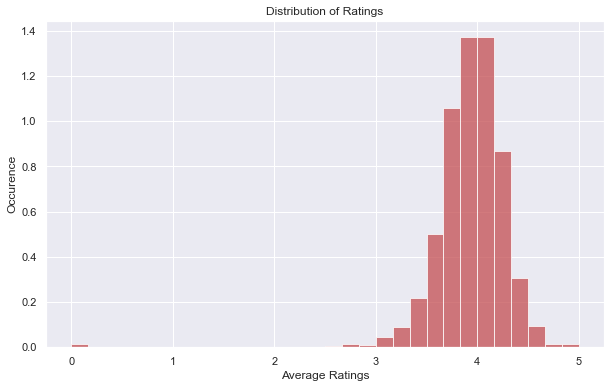

Minimum of Ratings: 0.0
Maximum of Ratings: 5.0
Average of Ratings: 3.93
Variance of Ratings: 0.12


In [38]:
plt.subplots(figsize=(10,6))
n, bins, patches = plt.hist(df['average_rating'], 30, density=1, facecolor='r', alpha=0.75)
plt.xlabel('Average Ratings')
plt.ylabel('Occurence')
plt.title('Distribution of Ratings')
plt.grid(True)
plt.show()
print("Minimum of Ratings:", round(min(df['average_rating']),2))
print("Maximum of Ratings:", round(max(df['average_rating']),2))
print("Average of Ratings:", round(np.mean(df['average_rating']),2))
print("Variance of Ratings:",round(np.var(df['average_rating']),2))

In [39]:
books_df[books_df['average_rating']==0]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,age
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,English,295,0,0,Lonely Planet,2001,22
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,English,112,0,0,BradyGames,2005,18
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,English,200,0,0,Grove Press Open City Books,2000,23
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,English,228,0,0,Frederick P. Lenz Foundation for American Budd...,2004,19
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,English,304,0,0,Frederick P. Lenz Foundation for American Budd...,2003,20
2758,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,Serbian,222,0,0,"Izdavačka agencija ""Draganić""",1996,27
3492,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,English,71,0,0,Macmillan,1992,31
4241,15186,American Film Guide,Frank N. Magill,0.0,English,5,0,0,Salem Press Inc,1983,40
4677,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,English,386,0,0,Routledge,2002,21
5323,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,English,63,0,0,Arts Publications,1997,26


In [40]:
zero_ratings=books_df[books_df['average_rating']==0].count().loc['bookID']
print(f'There are {zero_ratings} books in the dataset which has 0 ratings.')


There are 25 books in the dataset which has 0 ratings.


<AxesSubplot:xlabel='average_rating', ylabel='publication_year'>

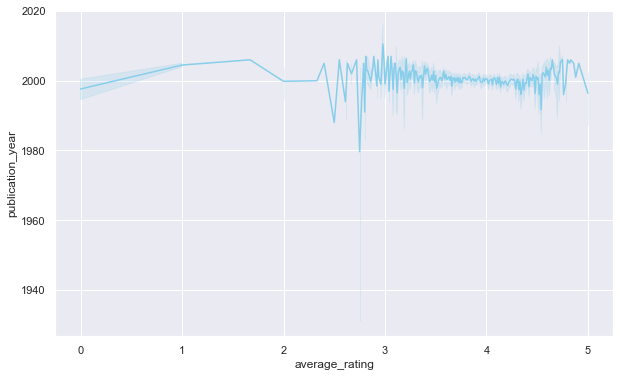

In [41]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.lineplot(x="average_rating", y="publication_year", data=books_df, color='skyblue')

In [ ]:
books_df.groupby('language_code')['average_rating'].agg(['mean'])

In [ ]:
#books_df = books_df.drop(['bookID','authors','title','isbn','isbn13','publication_date'],axis=1)
books_df.sample()

*Cutting down Dataframe to get rid of some outliers<br><br>
Drop rows where ratings count is higher than 100000<br>
Drop rows where text reviews count is less than 20000<br>
Drop rows where number of pages is more than 1500*<br>

In [141]:
books_df = books_df.drop(books_df.index[books_df['ratings_count'] >= 100000])
books_df = books_df.drop(books_df.index[books_df['text_reviews_count'] >= 200000])
books_df = books_df.drop(books_df.index[books_df['num_pages'] >= 1500])

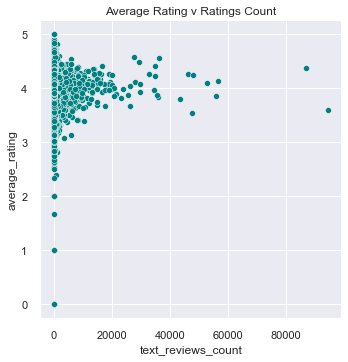

In [183]:
sns.relplot(x="text_reviews_count", y="average_rating", data=df, color='teal').set(title='Average Rating v Ratings Count')
plt.ticklabel_format(style='plain', axis='x')

In [47]:
books_df.sample()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,age
5160,18683,Meeting God at Every Turn,Catherine Marshall,4.36,English,256,213,13,Chosen Books,2002,21


In [48]:
books_df['language_code'].value_counts()

English               10163
Spanish                 215
French                  142
German                   99
Japanese                 46
Multiple languages       19
Chinese                  14
Ancient Greek            11
Portuguese               10
Italian                   5
Latin                     3
Russian                   2
Swedish                   2
Dutch                     1
Arabic                    1
Serbian                   1
Malay                     1
Galician                  1
Welsh                     1
Norwegian                 1
Turkish                   1
Gaelic                    1
Aleut                     1
Name: language_code, dtype: int64

In [49]:
books_df.sample()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,age
7075,27003,The Eyre Affair (Thursday Next #1),Jasper Fforde,3.91,English,374,97343,8068,Penguin Books,2003,20


In [50]:
books_df = books_df.drop(['bookID','title','publication_year','age'],axis=1)

#### *Feature Engineering*

In [51]:
df_model=books_df.copy()

In [52]:
df_model.sample()

,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher
7248,Alexander Pushkin/Charles Johnston/John Bayley,4.09,English,240,205,25,Penguin Classics


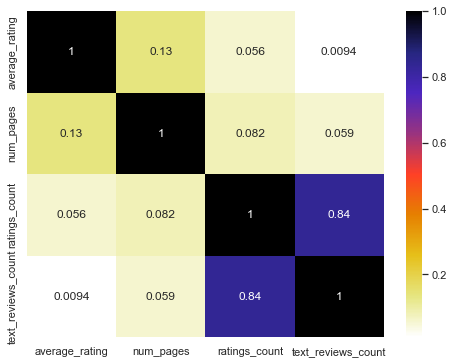

In [53]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = df_model.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features = correlation(books_df, 0.90)
len(set(corr_features))

0

In [56]:
corr_features

set()

In [57]:
df_model.shape

(10741, 7)

In [58]:
from sklearn import preprocessing
#feature engineering
#encode categorical variables (title, authors, publisher)

le = preprocessing.LabelEncoder()
df_model['authors'] = le.fit_transform(df_model['authors'])
df_model['publisher'] = le.fit_transform(df_model['publisher'])

#get dummy data for categorical variables (languages)
df_dum = pd.get_dummies(df_model['language_code'])
df_model = pd.concat([df_model, df_dum], axis = 1)


In [ ]:
#df_model = pd.get_dummies(df_model, columns=['language_code'],drop_first=True)

In [61]:
df_model = df_model.drop(['language_code'],axis=1)


In [62]:
df_model.sample()

,authors,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Aleut,Ancient Greek,Arabic,Chinese,...,Malay,Multiple languages,Norwegian,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,Welsh
2367,6018,3.57,436,1818,89,451,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#Seperate dataframe for target
X = df_model.drop("average_rating",axis=1)   #Feature Matrix
y = df_model["average_rating"]

In [64]:
#Standarize the features

#Apply a standard scaler to the data.
SS_scaler = StandardScaler()

# Fit the standard scaler to the data.
x_std = SS_scaler.fit_transform(X)

In [65]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7518, 28), (3223, 28))

In [66]:
X_train.corr()

,authors,num_pages,ratings_count,text_reviews_count,publisher,Aleut,Ancient Greek,Arabic,Chinese,Dutch,...,Malay,Multiple languages,Norwegian,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,Welsh
authors,1.000000,-0.000730,-0.010891,-0.022377,0.029577,-0.012536,-0.019734,0.014333,-0.009814,0.018207,...,-0.017484,0.006234,NaN,-0.029848,0.010409,NaN,-0.006991,-0.005825,-0.004209,NaN
num_pages,-0.000730,1.000000,0.096073,0.069499,0.010743,0.010160,0.011549,0.001171,-0.023489,0.022955,...,0.025161,0.020330,NaN,-0.014575,0.003411,NaN,0.026053,0.004314,0.004149,NaN
ratings_count,-0.010891,0.096073,1.000000,0.835979,-0.020129,-0.004895,-0.011107,-0.004879,-0.013163,-0.004924,...,-0.004957,-0.017933,NaN,-0.013772,-0.001807,NaN,-0.052482,-0.000563,-0.004153,NaN
text_reviews_count,-0.022377,0.069499,0.835979,1.000000,0.001388,-0.004530,-0.010738,-0.004603,-0.012737,-0.004658,...,-0.004713,-0.017457,NaN,-0.013104,-0.004272,NaN,-0.049719,0.000922,-0.004073,NaN
publisher,0.029577,0.010743,-0.020129,0.001388,1.000000,-0.017065,-0.022884,-0.018885,0.049279,-0.011483,...,0.000738,-0.007885,NaN,-0.009475,0.005801,NaN,0.001436,0.016149,0.018039,NaN
Aleut,-0.012536,0.010160,-0.004895,-0.004530,-0.017065,1.000000,-0.000298,-0.000133,-0.000352,-0.000133,...,-0.000133,-0.000516,NaN,-0.000376,-0.000188,NaN,-0.001646,-0.000133,-0.000133,NaN
Ancient Greek,-0.019734,0.011549,-0.011107,-0.010738,-0.022884,-0.000298,1.000000,-0.000298,-0.000788,-0.000298,...,-0.000298,-0.001153,NaN,-0.000842,-0.000421,NaN,-0.003681,-0.000298,-0.000298,NaN
Arabic,0.014333,0.001171,-0.004879,-0.004603,-0.018885,-0.000133,-0.000298,1.000000,-0.000352,-0.000133,...,-0.000133,-0.000516,NaN,-0.000376,-0.000188,NaN,-0.001646,-0.000133,-0.000133,NaN
Chinese,-0.009814,-0.023489,-0.013163,-0.012737,0.049279,-0.000352,-0.000788,-0.000352,1.000000,-0.000352,...,-0.000352,-0.001365,NaN,-0.000996,-0.000498,NaN,-0.004356,-0.000352,-0.000352,NaN
Dutch,0.018207,0.022955,-0.004924,-0.004658,-0.011483,-0.000133,-0.000298,-0.000133,-0.000352,1.000000,...,-0.000133,-0.000516,NaN,-0.000376,-0.000188,NaN,-0.001646,-0.000133,-0.000133,NaN


In [67]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(X_train).sum(), 100 * pd.isnull(X_train).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
authors,0,0.0
Swedish,0,0.0
Spanish,0,0.0
Serbian,0,0.0
Russian,0,0.0
Portuguese,0,0.0
Norwegian,0,0.0
Multiple languages,0,0.0
Malay,0,0.0
Latin,0,0.0


In [68]:
corr_features = correlation(X_train, 0.90)
len(set(corr_features))

0

#### *Below I am creating a python function called plot. Which will take one argument and It will plot distplot and an scatter plot through which we analuze the result better.*

In [69]:
def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(y_test,prediction, c='orange',label='predictions')
    ax2.plot(y_test,y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled')

####  *Below I am creating a python function called prediction table. Which will take one argument and It will create a table in which we can see the actual vs predicting along with the difference.*

In [80]:
def prediction_table(prediction):
   results = pd.DataFrame({'Actual': y_test.tolist(), 'predictions': prediction.tolist()}).head(10)
   return results.head(20)

In [74]:

def print_results(training,test,trainingpred,testingpred):
    print('MSE in train and Test: %.3f, test: %.3f' % (
        mean_squared_error(training, trainingpred),
        mean_squared_error(test, testingpred)))
    print('R^2 in train and Test: %.3f, test: %.3f' % (
        r2_score(training, trainingpred),
        r2_score(test, testingpred)))
    print('MAE in  train and Test: %.3f, test: %.3f' % (
        mean_absolute_error(training, trainingpred),
        mean_absolute_error(test, testingpred)))
    print('RMSE in  train and Test: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(training, trainingpred)),
        np.sqrt(metrics.mean_squared_error(test, testingpred))))

#### *Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable? . We are using scikit learn linear regression.    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.*

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#model.predict(X_test)
PredictionLR_Train  = model.predict(X_train)
avg_rating_PredictionLR  = model.predict(X_test)


root mean square error : 0.38163883588345554
R2 Score :  0.024762914083164556


In [75]:
print_results(y_train,y_test,PredictionLR_Train,avg_rating_PredictionLR)

MSE in train and Test: 0.110, test: 0.146
R^2 in train and Test: 0.039, test: 0.025
MAE in  train and Test: 0.224, test: 0.239
RMSE in  train and Test: 0.331, test: 0.382


In [76]:
avg_rating_PredictionLR

array([3.95729554, 3.87919608, 4.00204907, ..., 3.91592563, 3.92755757,
       3.91089917])

In [81]:
prediction_table(avg_rating_PredictionLR)

,Actual,predictions
0,4.53,3.957296
1,3.80,3.879196
2,3.92,4.002049
3,4.11,4.066589
4,3.89,3.889801
5,3.31,3.951350
6,3.66,3.914763
7,3.98,3.896977
8,4.01,4.031219
9,4.24,3.889729


#### *In the below cell we are implementing the Linear Regression with cross validation. https://scikit-learn.org/stable/modules/cross_validation.html*

In [82]:
clf_lr=LinearRegression()
clf_lr.fit(X_train, y_train)
accuracies=cross_val_score(estimator=clf_lr, X=X_train, y=y_train,cv=5,verbose=1)
#clf_lr.predict(X_test)
PredictionLRV_Train  = model.predict(X_train)
avg_rating_PredictionCLF  = model.predict(X_test)
print(accuracies)


[0.0354609  0.02894674 0.03489134 0.0253439  0.02801259]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [83]:
print_results(y_train,y_test,PredictionLRV_Train,avg_rating_PredictionCLF)

MSE in train and Test: 0.110, test: 0.146
R^2 in train and Test: 0.039, test: 0.025
MAE in  train and Test: 0.224, test: 0.239
RMSE in  train and Test: 0.331, test: 0.382


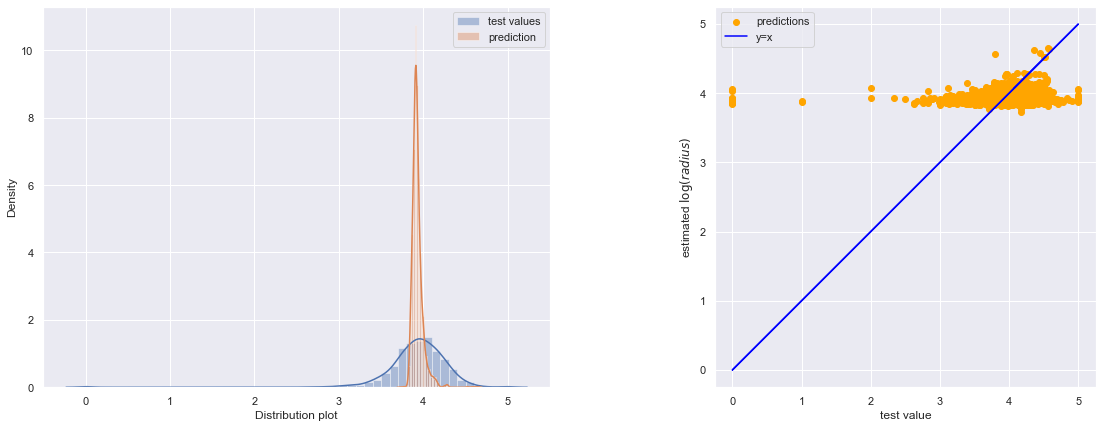

In [85]:
plot(avg_rating_PredictionCLF)

In [86]:
prediction_table(avg_rating_PredictionCLF)

,Actual,predictions
0,4.53,3.957296
1,3.80,3.879196
2,3.92,4.002049
3,4.11,4.066589
4,3.89,3.889801
5,3.31,3.951350
6,3.66,3.914763
7,3.98,3.896977
8,4.01,4.031219
9,4.24,3.889729


##### *Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. https://www.saedsayad.com/decision_tree_reg.htm#:~:text=Decision%20tree%20builds%20regression%20or,decision%20nodes%20and%20leaf%20nodes.*

In [87]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
#model.predict(X_test)
PredictionDTT_Train  = model.predict(X_train)
Avg_RatingPrediction_DT  = model.predict(X_test)


In [88]:
print_results(y_train,y_test,PredictionDTT_Train,Avg_RatingPrediction_DT)

MSE in train and Test: 0.000, test: 0.217
R^2 in train and Test: 1.000, test: -0.454
MAE in  train and Test: 0.000, test: 0.312
RMSE in  train and Test: 0.002, test: 0.466


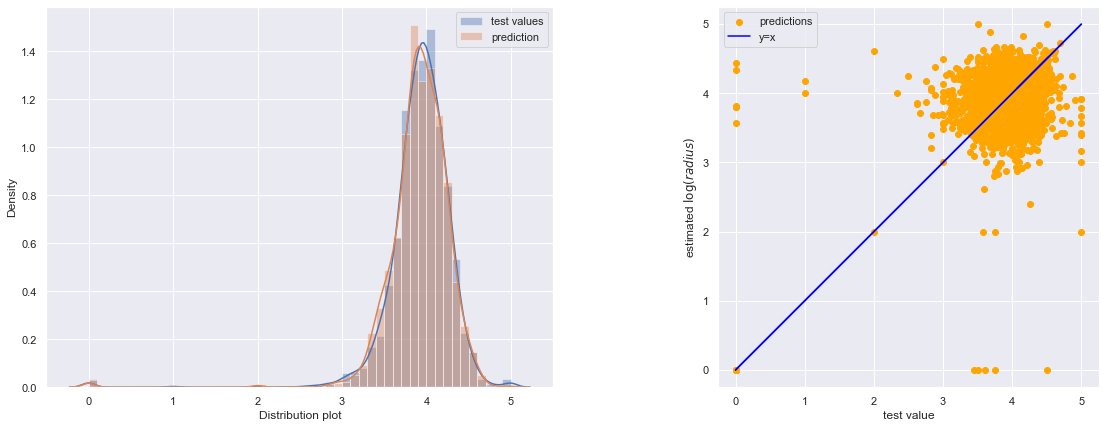

In [89]:
plot(Avg_RatingPrediction_DT)

In [90]:
prediction_table(Avg_RatingPrediction_DT)

,Actual,predictions
0,4.53,4.36
1,3.80,3.89
2,3.92,3.84
3,4.11,4.12
4,3.89,4.19
5,3.31,4.29
6,3.66,4.08
7,3.98,3.78
8,4.01,4.61
9,4.24,3.94


##### *Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html*

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
PredictionGBR_Train  = model.predict(X_train)
AveragePredictionGBR  = model.predict(X_test)


In [92]:
print_results(y_train,y_test,PredictionGBR_Train,AveragePredictionGBR)

MSE in train and Test: 0.075, test: 0.121
R^2 in train and Test: 0.339, test: 0.187
MAE in  train and Test: 0.205, test: 0.230
RMSE in  train and Test: 0.275, test: 0.348


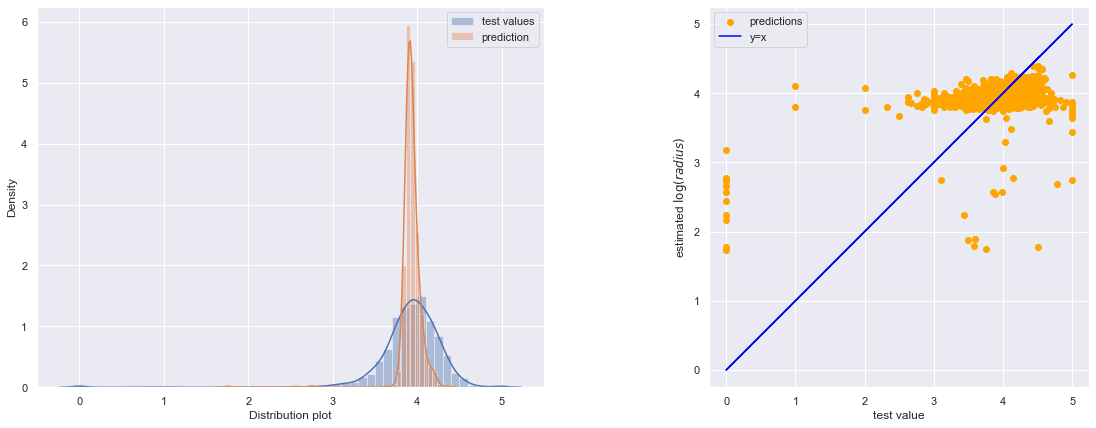

In [93]:
plot(AveragePredictionGBR)

In [94]:
prediction_table(AveragePredictionGBR)

,Actual,predictions
0,4.53,3.892602
1,3.80,3.839870
2,3.92,4.052976
3,4.11,3.948507
4,3.89,3.925289
5,3.31,3.943367
6,3.66,3.884933
7,3.98,3.896480
8,4.01,4.154928
9,4.24,3.881623


##### *Regression based on k-nearest neighbors The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html*



In [95]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

PredictionKNN_Train  = model.predict(X_train)
avg_PredictionKNN  = model.predict(X_test)


In [96]:
print_results(y_train,y_test,PredictionKNN_Train,avg_PredictionKNN)

MSE in train and Test: 0.080, test: 0.159
R^2 in train and Test: 0.297, test: -0.066
MAE in  train and Test: 0.196, test: 0.254
RMSE in  train and Test: 0.283, test: 0.399


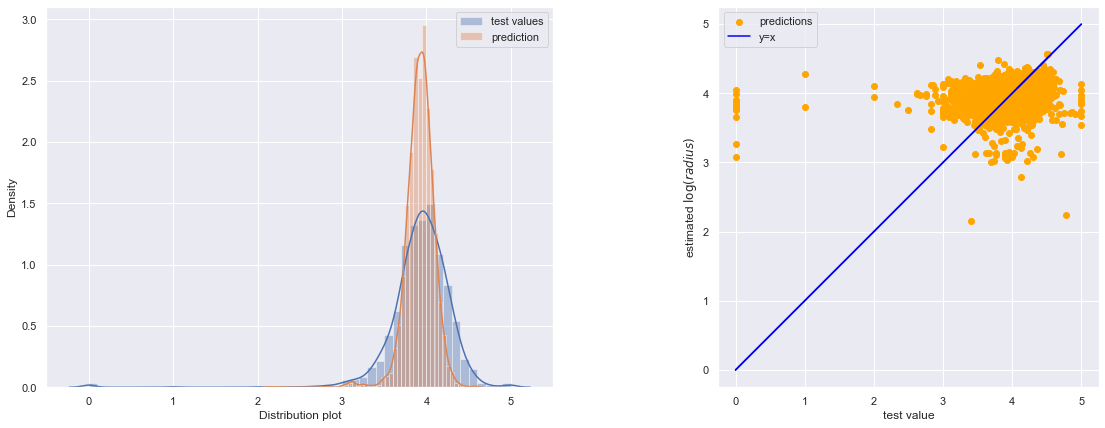

In [98]:
plot(avg_PredictionKNN)

In [99]:
prediction_table(avg_PredictionKNN)

,Actual,predictions
0,4.53,4.102
1,3.80,3.812
2,3.92,4.028
3,4.11,3.976
4,3.89,4.042
5,3.31,3.950
6,3.66,3.894
7,3.98,3.676
8,4.01,4.170
9,4.24,3.770


##### *Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html*

In [100]:
from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor(n_jobs=-1, random_state=42)
model = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
model.fit(X_train, y_train)
RatingPrediction_RfTrain  = model.predict(X_train)
RatingPredictio_RF_test  = model.predict(X_test)



' mse = mean_squared_error(y_test, RatingPrediction_RfTrain)\nrmse = np.sqrt(mse)\nprint("root mean square error : "+str(rmse))\nr2 = r2_score(y_test,diameterPredictionRF)\nprint("R2 Score : ",r2)\nprint(model.get_params()) '

In [102]:
print_results(y_train,y_test,RatingPrediction_RfTrain,RatingPredictio_RF_test)

MSE in train and Test: 0.013, test: 0.122
R^2 in train and Test: 0.888, test: 0.185
MAE in  train and Test: 0.079, test: 0.227
RMSE in  train and Test: 0.113, test: 0.349


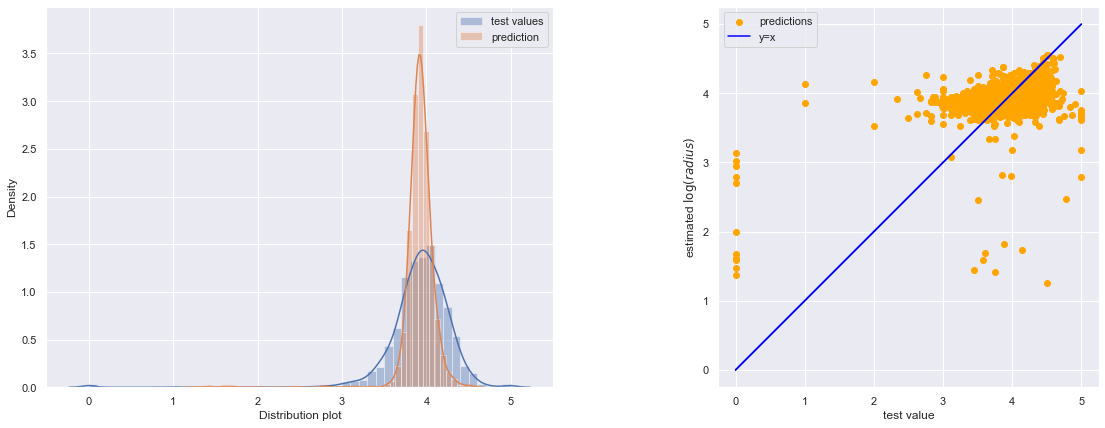

In [103]:
plot(RatingPredictio_RF_test)

In [105]:
prediction_table(RatingPredictio_RF_test)

,Actual,predictions
0,4.53,4.02940
1,3.80,3.84441
2,3.92,4.04609
3,4.11,4.08526
4,3.89,4.02709
5,3.31,3.90218
6,3.66,3.84138
7,3.98,3.85905
8,4.01,4.19488
9,4.24,3.80717


In [106]:
from sklearn.ensemble import RandomForestRegressor
clf_lr=RandomForestRegressor()
clf_lr.fit(X_train, y_train)
accuracies=cross_val_score(estimator=clf_lr, X=X_train, y=y_train,cv=8,verbose=1)
avg_rating_PredictionRFSC_Train  = model.predict(X_train)
avg_rating_PredictionRFSC  = model.predict(X_test)
print(accuracies)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.1s finished


[0.18195706 0.06747433 0.24328127 0.14502801 0.22500306 0.30323477
 0.04591262 0.11787301]


In [107]:
print_results(y_train,y_test,avg_rating_PredictionRFSC_Train,avg_rating_PredictionRFSC)

MSE in train and Test: 0.013, test: 0.122
R^2 in train and Test: 0.888, test: 0.185
MAE in  train and Test: 0.079, test: 0.227
RMSE in  train and Test: 0.113, test: 0.349


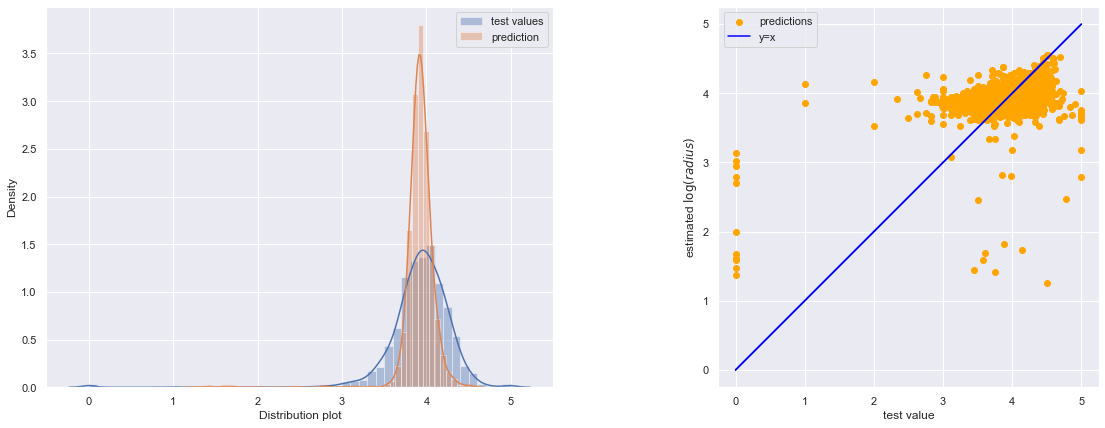

In [108]:
plot(avg_rating_PredictionRFSC)

In [109]:
prediction_table(avg_rating_PredictionRFSC)

,Actual,predictions
0,4.53,4.02940
1,3.80,3.84441
2,3.92,4.04609
3,4.11,4.08526
4,3.89,4.02709
5,3.31,3.90218
6,3.66,3.84138
7,3.98,3.85905
8,4.01,4.19488
9,4.24,3.80717


##### *XGBoost is an open-source software library that implements optimized distributed gradient boosting machine learning algorithms under the Gradient Boosting framework.  https://www.nvidia.com/en-us/glossary/data-science/xgboost/ *

In [110]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]


In [111]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from xgboost import *
import sklearn as skl
from sklearn import *
from sklearn.preprocessing import LabelEncoder
modelxgb = XGBRegressor(n_estimators=100)
modelxgb.fit(X_train, y_train)
avg_rating_PredictionXBR_train  = modelxgb.predict(X_train)
avg_rating_PredictionXBR  = modelxgb.predict(X_test)

In [112]:
print_results(y_train,y_test,avg_rating_PredictionXBR_train,avg_rating_PredictionXBR)

MSE in train and Test: 0.029, test: 0.124
R^2 in train and Test: 0.743, test: 0.171
MAE in  train and Test: 0.129, test: 0.224
RMSE in  train and Test: 0.171, test: 0.352


In [ ]:
X_train.sample()

In [113]:
prediction_table(avg_rating_PredictionXBR)

,Actual,predictions
0,4.53,3.889721
1,3.80,3.765102
2,3.92,3.956709
3,4.11,4.032903
4,3.89,3.914522
5,3.31,3.856526
6,3.66,3.773278
7,3.98,3.953650
8,4.01,4.093879
9,4.24,3.790797


#### *Let’s visualize the importances (chart will be easier to interpret than values). Please visit the mentioned URL for detailed  https://mljar.com/blog/feature-importance-xgboost/#:~:text=Xgboost%20is%20a%20gradient%20boosting,%2C%20R%2C%20Julia%2C%20Scala.*

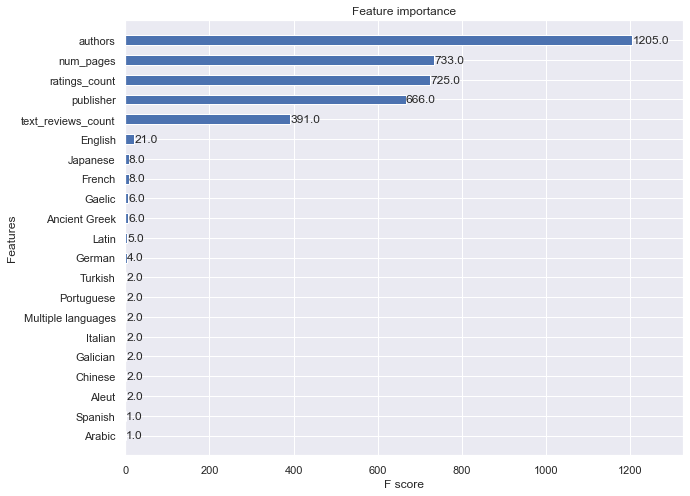

In [114]:
fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(modelxgb, height=0.5, ax=ax, importance_type='weight')
plt.show()

In [229]:
# initialize list of lists

data = [['Linear Regression', 0.110,0.146,0.039,0.025,0.224,0.239,0.331,0.382], 
        ['Decision Tree Regressor', 0.00,0.217,1.00,-0.454,0.00,0.312,0.002,0.466], 
        ['Gradient Boosting Regressor', 0.075,0.121,0.339,0.187,0.205,0.230,0.275,0.348],
        ['KNeighbors Regressor', 0.080,0.159,0.297,-0.066,0.196,0.254,0.283,0.399]
       ,['RandomForest Regressor', 0.013,0.122,0.888,0.185,0.079,0.227,0.113,0.349],
        ['XGBRegressor', 0.029,0.124,0.743,0.171,0.129,0.224,0.171,0.352]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Algorithm Name', 'MSE Train','MSE Test','R^2 Train','R^2 Test','MAE Train','MAE Test','RMSE Train','RMSE Test'])
  
# print dataframe.
df

,Algorithm Name,MSE Train,MSE Test,R^2 Train,R^2 Test,MAE Train,MAE Test,RMSE Train,RMSE Test
0,Linear Regression,0.110,0.146,0.039,0.025,0.224,0.239,0.331,0.382
1,Decision Tree Regressor,0.000,0.217,1.000,-0.454,0.000,0.312,0.002,0.466
2,Gradient Boosting Regressor,0.075,0.121,0.339,0.187,0.205,0.230,0.275,0.348
3,KNeighbors Regressor,0.080,0.159,0.297,-0.066,0.196,0.254,0.283,0.399
4,RandomForest Regressor,0.013,0.122,0.888,0.185,0.079,0.227,0.113,0.349
5,XGBRegressor,0.029,0.124,0.743,0.171,0.129,0.224,0.171,0.352


#### *Conclusion*<br> 
*From the observations, we see that a Random Forest model performed the best on the test data.
However, the overall scores are not very good, but the displayed actual versus predicted data shows
some satisfying result.*